В домашнем задании нужно сократить число цветов в палитре изображения. 

Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.




In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import skimage
import numpy as np
import pandas as pd
from pylab import rcParams

rcParams['figure.figsize'] = (10,10)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

a) Для отображения картинки воспользуйтесь вспомогательной функцией:

b) Для загрузки картинки можно использовать код:

img = cv.imread(path)

In [8]:
img_path = '/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/13.Clusterization/01.jpg'

In [9]:
# Уменьшил размер входного изображения для избежания ошибки недостаточного объема ОЗУ при применении AgglomerativeClustering:

img1 = cv2.imread(img_path)

scale_percent = 20
width = int(img1.shape[1] * scale_percent / 100)
height = int(img1.shape[0] * scale_percent / 100)
dim = (width, height)

img = cv2.resize(img1, dim)

In [10]:
b, g, r = cv2.split(img)

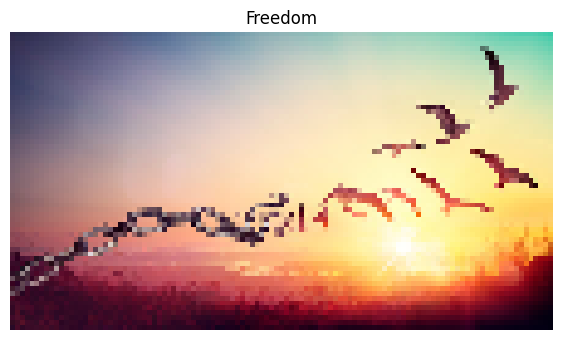

In [11]:
draw_picture(img, 'Freedom')

Реализуйте три модели кластеризации:

a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

b) DBSCAN

c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from skimage.metrics import structural_similarity as ssim

In [13]:
def run(clusterization, img):
    img_data = np.copy(img).reshape(-1, 3)
    clusters = clusterization.fit_predict(img_data)
    for i, x in enumerate(np.unique(clusters)):
        current_cluster = img_data[clusters == x]
        img_data[clusters == x] = np.mean(current_cluster, axis=0)
    new_img = img_data.reshape(img.shape)
    plt.figure(figsize=(10, 10))
    plt.title('clusters = {}'.format(len(np.unique(clusters))))
    plt.imshow(new_img)
    plt.show()
    return new_img, ssim(img, new_img, channel_axis=2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


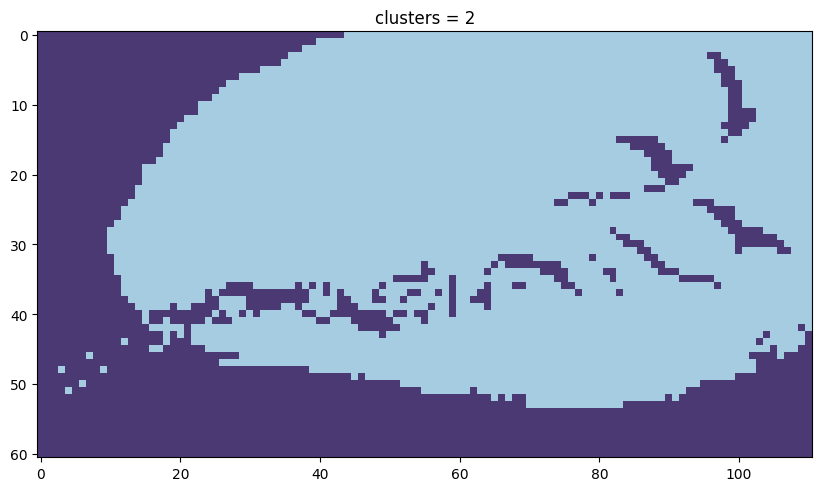


SSIM = 0.604



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


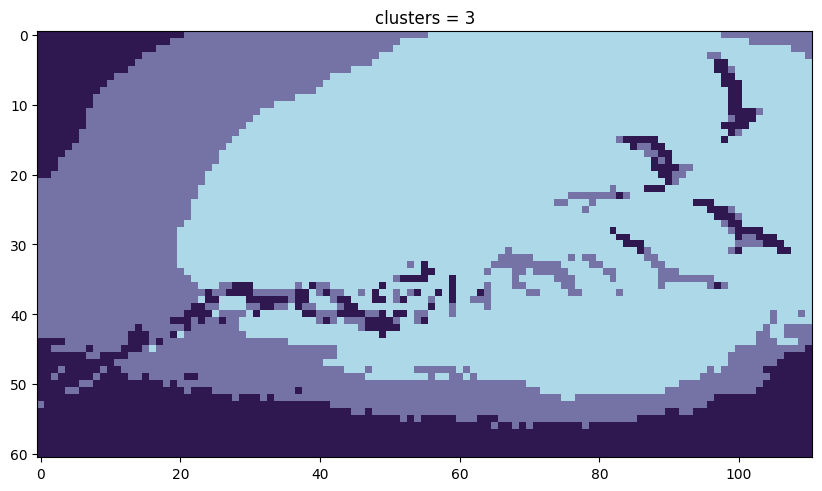


SSIM = 0.685



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


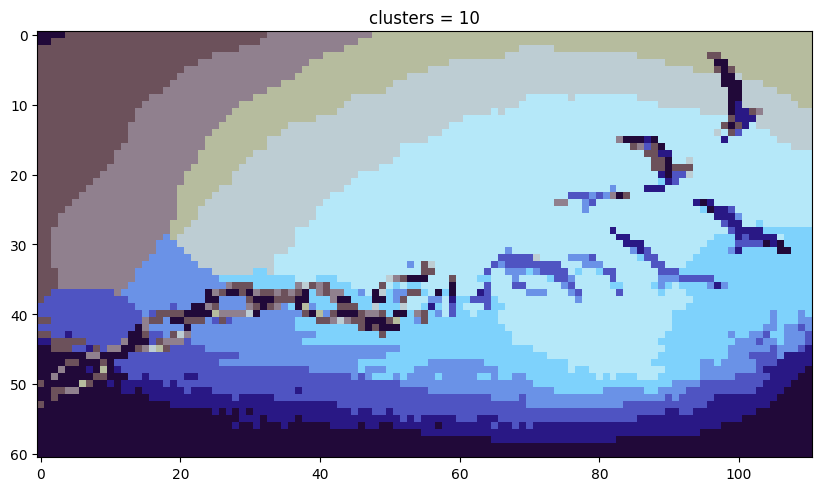


SSIM = 0.782



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


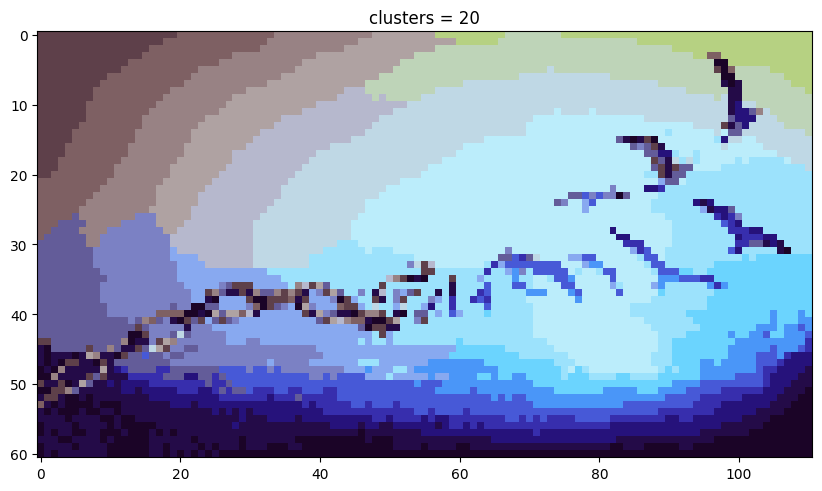


SSIM = 0.836



In [14]:
K = [2, 3, 10, 20]
for k in K:
    print ('\nSSIM = {:.3f}\n'.format(run(KMeans(random_state=42, n_clusters=k), img)[1]))

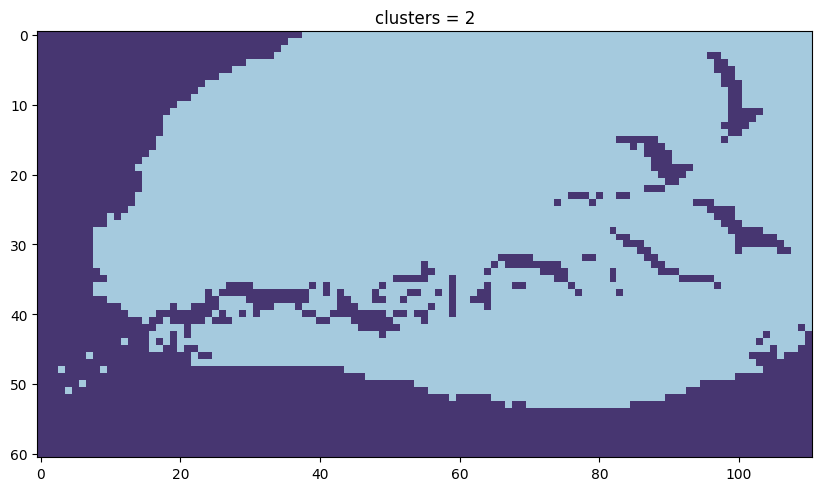


SSIM = 0.604



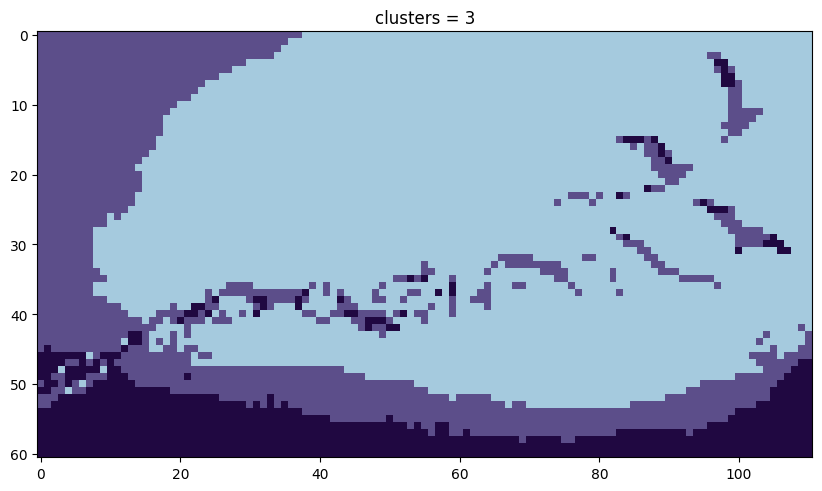


SSIM = 0.669



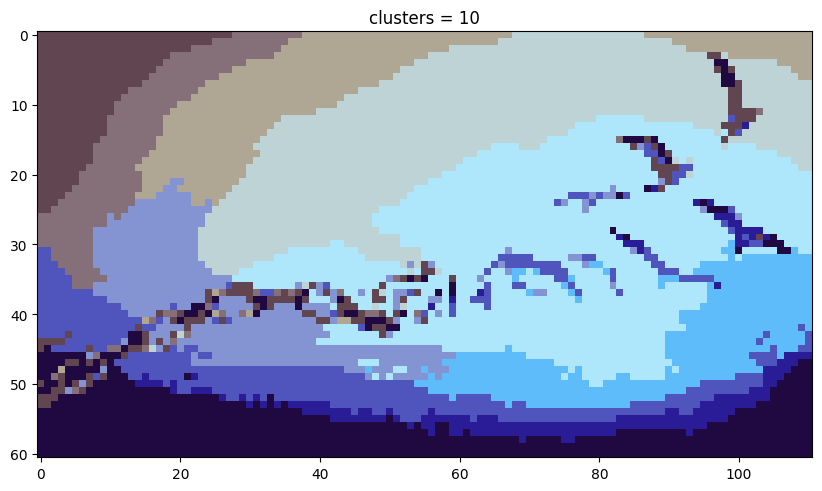


SSIM = 0.741



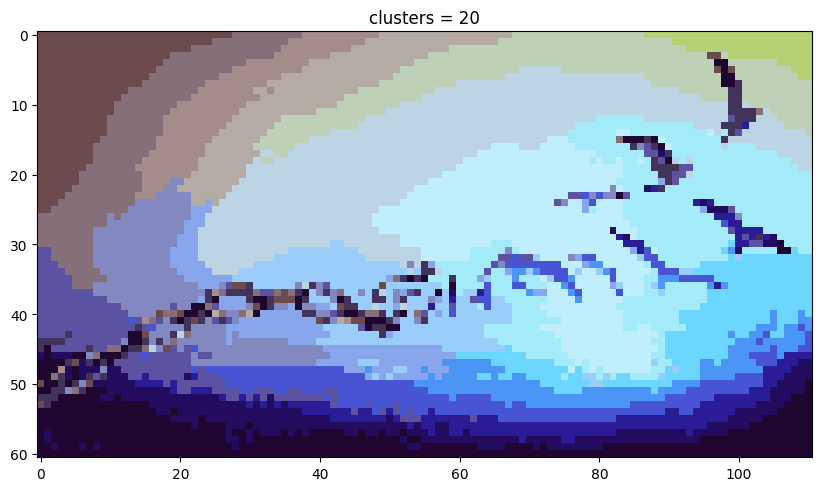


SSIM = 0.815



In [17]:
for k in K:
    print ('\nSSIM = {:.3f}\n'.format(run(AgglomerativeClustering(n_clusters=k), img)[1]))

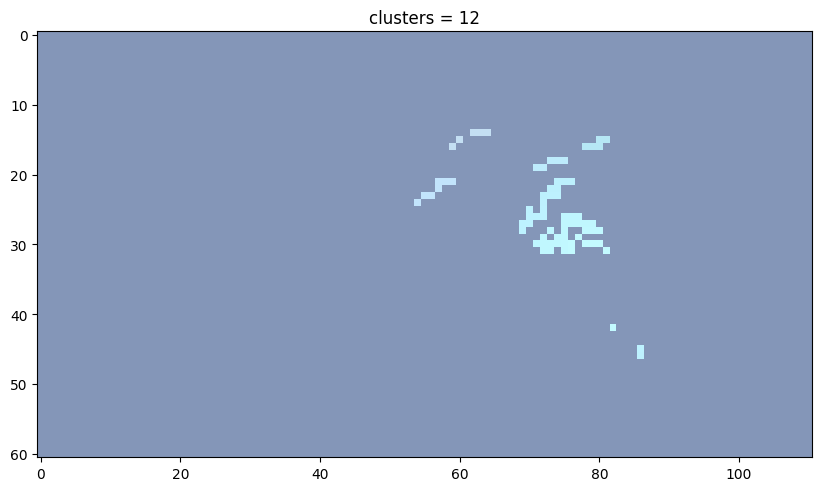


SSIM = 0.289



In [16]:
print ('\nSSIM = {:.3f}\n'.format(run(DBSCAN(), img)[1]))    

Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

Сформулируйте выводы по проделанной работе.

a) Какая модель показала лучший результат?

Наилучший результат показала модель KMeans с количеством кластеров 20, несколько хуже показала себя модель AgglomerativeClustering с количеством кластеров 20